In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import * 
from rates import *
from lightcurves import *

In [2]:
data = np.load('./products/iin-highz.npz', allow_pickle=True)
redshifts = data['redshifts']
metric_tracker = data['metric_tracker']
metric_list = data['metric_list']
print(metric_list)

{'snr3': (<function snr at 0x15a812050>, (5, 5)), 'snr5': (<function snr at 0x15a812050>, (10, 5)), 'snr-r-3': (<function snr_one_filt at 0x15a812200>, ('g', 3, 5)), 'rise3': (<function during_rise at 0x15a812320>, (3,)), 'fall3': (<function during_fall at 0x15a8123b0>, (3,)), 'afterexp': (<function after_exp at 0x15a812560>, (5, 1, 5)), 'brighterthan22': (<function brighter_than_mag at 0x15a812440>, (22, 5, 10)), 'brighterthan22p5': (<function brighter_than_mag at 0x15a812440>, (22.5, 5, 10))}


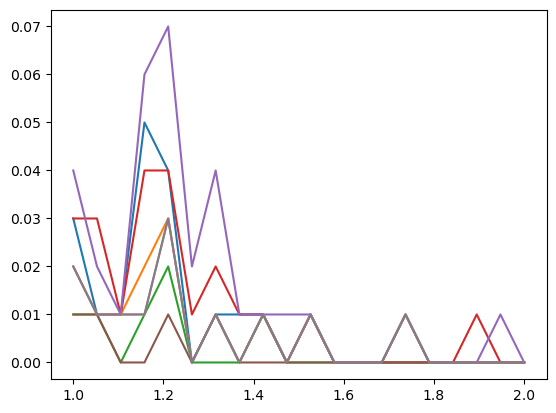

In [3]:
efficiencies = calc_efficiences(metric_tracker)
plt.plot(redshifts, efficiencies)
plt.show()

20
[ 61512.64120452  42223.65602424  19184.7471335   71782.52200551
 105961.35120125  12091.81807771  38736.40103523  38736.40103523] 1 / rad2


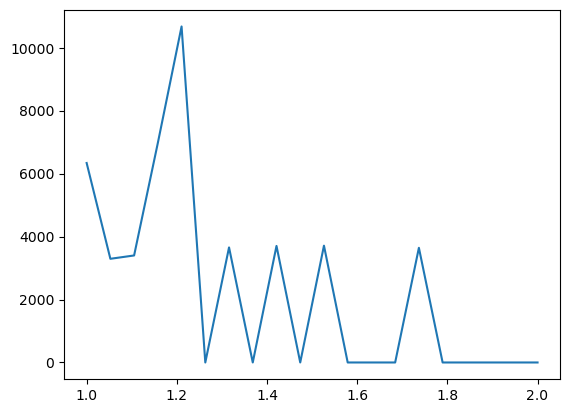

In [4]:
def rate_strolger(z):
	"""
	From https://iopscience.iop.org/article/10.1088/0004-637X/813/2/93/pdf
	Eqn 9
	"""
	A = 0.015
	B = 1.5
	C = 5.0 
	D = 6.1
	k = 0.006
	rate = 1e9 * k * A * (1 + z)**C / (((1 + z)/B)**D + 1)
	return rate

print(len(redshifts))
# that 0.04 is the percent from the CCSN population

integrand, total_rate = calc_rate(redshifts, efficiencies, rate_strolger, rate_z0=0.04)

dz = redshifts[1] - redshifts[0];
plt.plot(redshifts, dz * integrand.value[:,1] * 1e-9)
print(total_rate)
#plt.plot(redshifts, integrand)

In [5]:
# Calculate a new metric, using the light curves
# Do not use this box!!!! IT calculates a fraction that is not quite right
def snr(lc, num=10, sigma=5):
    snr_count = np.sum(lc.snrs>sigma)
    if snr_count < num:
        return 0
    else:
        return 1

lcs = np.load('./products/lcs.npz', allow_pickle=True)['lcs']
all_true = 0
for lc in lcs:
    all_true = all_true + snr(lc)
print(all_true / len(lcs))

0.009636767976278725
